In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load the Data
df = pd.read_csv('Datasets/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Seprate the input and output

In [4]:
# Input Data should be 2-Dim
x = df[['YearsExperience']]

y = df['Salary']

In [5]:
x.shape

(30, 1)

In [7]:
y.shape

(30,)

In [18]:
# Correlation Btw Salary and Year of Experience
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


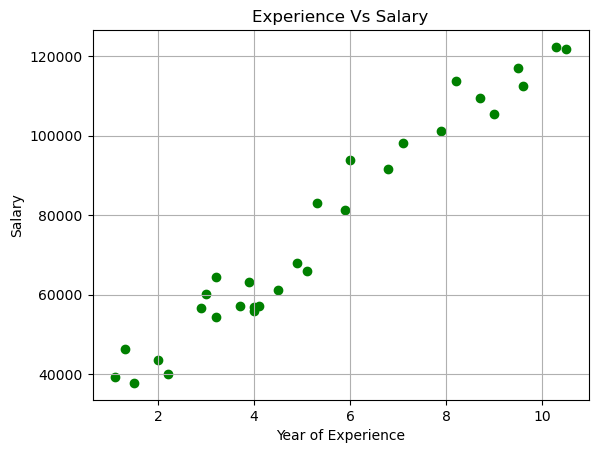

In [20]:
# Plot the Data
plt.grid()
plt.title("Experience Vs Salary")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.scatter(x,y, color = 'green')

### Cross Validation

In [21]:
# Import the Function
from sklearn.model_selection import train_test_split

In [29]:
# Split the data in train(75%) and testing(25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [31]:
# Know the Value of Train and Test
x_train.size, y_train.size, x_test.size, y_test.size

(22, 22, 8, 8)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
regressor = LinearRegression()

In [34]:
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
m = regressor.coef_[0]
m

9379.710491946016

In [40]:
c = regressor.intercept_
c

26986.691316737248

In [45]:
exp = int(input("Please enter year of experience :" ))
print("Salary of Person is :", regressor.predict([[exp]]))

Please enter year of experience : 12


Salary of Person is : [139543.21722009]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Predict the test Data

In [46]:
# Apply on Test Dataset
y_pred = regressor.predict(x_test)
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

### Find the Average distance btw them (Error)

In [47]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicated': y_pred
})
result

,Actual,Predicated
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [48]:
result_Err = pd.DataFrame({
    'x': x_test['YearsExperience'],
    'y': y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'abs(Error)': abs(y_pred-y_test)
})
result_Err

,x,y,y^,Error,abs(Error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [50]:
# Average of Error
np.mean(result_Err['abs(Error)'])

3508.5455930660555

In [53]:
# Using Sklearn Function
from sklearn.metrics import mean_absolute_error

In [54]:
mean_absolute_error(y_test, y_pred)

3508.5455930660555

### Root Mean Square

In [55]:
# Error - > Square -> Mean -> SqureRoot

In [56]:
result_Err_sqr = pd.DataFrame({
    'x': x_test['YearsExperience'],
    'y': y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'Error^2':(y_pred-y_test)**2
})
result_Err_sqr

,x,y,y^,Error,Error^2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [58]:
np.sqrt(np.mean(result_Err_sqr['Error^2']))

4733.70258289858

In [59]:
# using Sklearn

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [62]:
# R-Square Error

In [63]:
mean_val = np.mean(y_test)
mean_val

84406.25

In [68]:
num = np.sum((y_test-mean_val)**2) - np.sum((y_test-y_pred)**2)
r2 = num / np.sum((y_test - mean_val)**2)

print(r2*100)

97.792083354176


In [69]:
from sklearn.metrics import r2_score

In [70]:
r2_score(y_test, y_pred)

0.9779208335417602

In [72]:
# Predication and doing
regressor.score(x_test, y_test)

0.9779208335417602

In [74]:
regressor.score(x, y)

0.955975487542377

In [75]:
regressor.score(x_train, y_train)

0.9395413526983522

### Visualization


In [77]:
y_pred = regressor.predict(x)

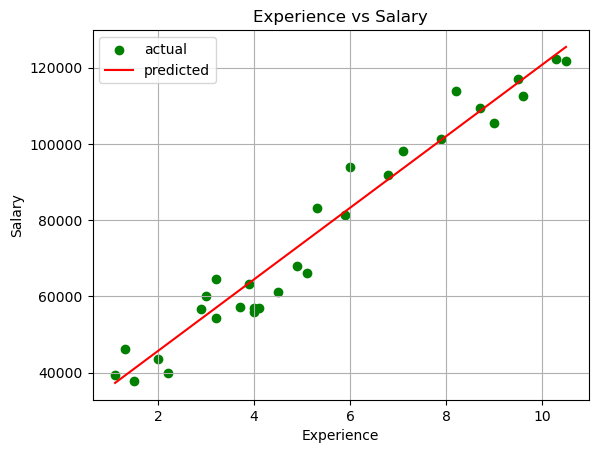

In [82]:
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red', label = 'predicted')
plt.legend()

In [79]:
y_pre_test = regressor.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pre_test)

0.05754512646779697

In [86]:
exp = int(input("Please enter year of experience :" ))
exp = pd.DataFrame({'YearsExperience':[exp]})
sal = regressor.predict(exp)
print("Salary of Person is :", sal[0])

Please enter year of experience : 9


Salary of Person is : 111404.08574425138
